这一节开始，介绍一些常用的概率分布（其实主要为了后续的LDA（隐狄利克雷分配）模型做准备），首先让我们从一枚硬币开始吧

## 伯努利分布
假设我们手头有一枚硬币，用随机变量$x$描述扔硬币的结果，记$x=1$表示正面，$x=0$表示反面，另外$x=1$发生的概率记为$\mu$，那么$x=0$的概率就为$1-\mu$（$\mu$未必为0.5），那么伯努利分布就是抛一次硬币的概率分布：    

$$
Bern(x\mid \mu)=\mu^x(1-\mu)^{1-x}
$$   

### 均值、方差

接着，我们可以很容易的求出该分布的均值、方差：    

$$
E[x]=1*u+0*(1-u)=u\\
var[x]=E[(x-E[x])^2]=E[x^2]-(E[x])^2=1^2*u+0^2*(1-u)-u^2=u-u^2
$$   

### 极大似然估计

接下来，我们需要考虑考虑一个问题，假如给了我们一堆iid采样的样本$X=\{x_1,x_2,...,x_N\}$，如何去估计伯努利分布的参数$\mu$，常用的一种方式就是极大似然估计，首先写出它的似然函数：    

$$
p(X\mid\mu)=\prod_{i=1}^N[\mu^{x_i}(1-\mu)^{1-x_i}]
$$   

那么，其对数似然函数为：   

$$
ln[p(X\mid\mu)]=\sum_{i=1}^N[x_iln\mu+(1-x_i)ln(1-\mu)]
$$   

令$ln[p(X\mid\mu)]$关于$\mu$的导数为0，可求得：   

$$
\mu_{ML}=\frac{m}{N}
$$   

其中，$m=\sum_{i=1}^Nx_i$。因此在极大似然估计的框架下，正面向上发生的概率是数据集里正面向上的观测所占的比例，但同时我们也可以发现一个问题，那就是如果观测量很少，极大似然估计的结果会出现**过拟合**的情况，比如我们连续抛一枚硬币3次，碰巧3次都是正面朝上，那么$N=m=3$，则$\mu_{ML}=1$，这显然不太合理，后面我们会引入关于$\mu$的先验概率来得到一个更加合理的结果

## 二项分布
接下来我们对问题做一个的升级，假设我们一共抛了硬币$N$次，其中关于正面$x=1$出现次数$m$的概率分布称为二项分布，根据前面的推导，我们可以很容易写出它的分布：    

$$
Bin(m\mid N,\mu)=\binom{N}{m}\mu^m(1-\mu)^{N-m}
$$  

其中，$\binom{N}{m}=\frac{N!}{(N-m)!m!}$，即$N$种组合中出现$m$次正面朝上的概率   

### 均值、方差
如何按照定义求解会稍稍有些麻烦，由于二项分布可以看做$N$次独立的伯努利事件，那么**加和的均值等于均值的加和，加和的方差等于方差的加和**，我们知道$m=x_1+x_2+\cdots+x_N$，所以：   

$$
E[m]=E[x_1]+E[x_2]+\cdots+E[x_N]=N\mu\\
var[m]=var[x_1]+var[x_2]+\cdots+var[x_N]=N\mu(1-\mu)
$$

### 极大似然估计
二项分布的极大似然估计求解其实和伯努利分布的求解一样，即在$N$次独立的伯努利实验中正面朝上出现的次数$m$所占的比例：    

$$
\mu_{ML}=\frac{m}{N}
$$   

那么，接下来让我们解决一下上面提到的过拟合问题，即为$\mu$引入一个先验分布$p(\mu)$，而对于二项分布比较有用的一个先验分布便是Beta分布

## Beta分布

在构建先验分布时，我们往往想偷懒，因为如果先验分布比较复杂，再让它与似然函数相乘，那么后验的求解会更加困难，所以我们希望找到一种先验分布，它与似然函数相乘后也是易于分析的，最直接的一种方式就是构造一种与似然函数结构类似的先验分布，比如二项分布为某个因子与$\mu^m(1-\mu)^{N-m}$相乘的结果，那么我们同样构造一个类似结构先验分布，那么它们的乘积也会具有相同的结构，**即找到一个先验分布，让它与似然函数相乘后具有和先验分布相同的函数形式，这样的性质被称为共轭性**，那么我们可以假设我们的先验项中包含有$\mu^a(1-\mu)^b$这么一项，直观理解就是，我们先验分布中抛了$a+b$次硬币，其中$a$次正面朝上，$b$次反面朝上，由于需要做成一个分布，所以我们还需要找到一个归一化系数$\beta$，使得：   

$$
\int_0^1\beta\mu^a(1-\mu)^bd\mu=1
$$   

这里直接写出这个系数的表达式：   

$$
\beta=\frac{\Gamma(a+b+2)}{\Gamma(a+1)\Gamma(b+1)}
$$

其中，$\Gamma(\cdot)$为Gamma函数，它的定义如下：   

$$
\Gamma(x)=\int_0^{\infty}t^{x-1}e^{-t}dt
$$  

它看起来很奇怪，但它有一个很有用的性质：   

$$
\Gamma(x)=(x-1)\Gamma(x-1)
$$  


更多关于Gamma函数的由来，推荐博客：[《神奇的Gamma函数》](http://www.52nlp.cn/lda-math-%E7%A5%9E%E5%A5%87%E7%9A%84gamma%E5%87%BD%E6%95%B01)，接下来，我们就可以得到这个分布的形式了：   

$$
p(\mu\mid a,b)=\frac{\Gamma(a+b+2)}{\Gamma(a+1)\Gamma(b+1)}\mu^a(1-\mu)^b
$$  

但是呢...这个分布不是很美观，对超参做一个简单调整，令$a=a-1,b=b-1$，就得到了我们最终Beta分布的形式了：       

$$
Beta(\mu\mid a,b)=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}
$$  

这里，$a,b$是先验分布中的超参数，关于不同$a,b$取值下的$\mu$的分布如下图

<img src="../images/beta分布的超参数.png" width="40%">



可以发现一些简单的规律，比如若$a=1,b=1$，Beta分布则为$(0,1)$上的均匀分布，再比如随着$a,b$取值的增加，分布的“峰”会更尖，说明方差会越小，分布会越集中
### 均值、方差
对于期望的求解，我们需要用到分布中自带的一个有用的性质：    

$$
\int_0^1\mu^{a-1}(1-\mu)^{b-1}d\mu=\frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}
$$   

所以，均值：   

$$
E[\mu]=\int_0^1\mu\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}d\mu\\
=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\int_0^1\mu^{(a+1)-1}(1-\mu)^{b-1}d\mu\\
=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\frac{\Gamma(a+1)\Gamma(b)}{\Gamma(a+b+1)}\\
=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\frac{a\Gamma(a)\Gamma(b)}{(a+b)\Gamma(a+b)}\\
=\frac{a}{a+b}
$$   

$E[\mu^2]$的推导与$E[\mu]$类似，只是上面积分项中$\mu^{(a+1)-1}$变化为$\mu^{(a+2)-1}$，所以： 

$$
E[\mu^2]=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\frac{\Gamma(a+2)\Gamma(b)}{\Gamma(a+b+2)}\\
=\frac{a(a+1)}{(a+b)(a+b+1)}
$$   

所以，方差：   

$$
var[\mu]=E[\mu^2]-(E[\mu])^2=\frac{ab}{(a+b)^2(a+b+1)}
$$   

### 后验分布
接下来看看后验概率分布长什么样子，我们将Beta分布和上面的二项分布相乘后，可以整理得到：    

$$
p(\mu\mid m,l,a,b)=\frac{\Gamma(m+a+l+b)}{\Gamma(m+a)\Gamma(l+b)}\mu^{m+a-1}(1-\mu)^{l+b-1}
$$   

这里，$N=m+l$，可以发现这也是一个Beta分布，即$Beta(\mu\mid a+m,b+l)$，显然这样的结果看起来也很make sense，我们可以通过它的均值来直观感受一下：   

$$
E[u]=\frac{m+a}{m+a+l+b}
$$

### 贝叶斯推断

既然写出了后验分布的形式，那接下来就可以做预测了，比如下一次抛出正面的概率为：      

$$
\int_0^1Bern(x=1\mid\mu)p(\mu\mid m,l,a,b)d\mu=\int_0^1\mu p(\mu\mid m,l,a,b)d\mu=E_{p(\mu\mid m,l,a,b)}[u]=\frac{m+a}{m+a+l+b}
$$

### 证明补充

接下来对上面的内容做一些证明补充，第一个问题是若随机变量独立，那么它们的和的均值等于它们均值的和，以及它们的和的方差等于它们方差的和，第二个问题是Beta分布中归一化系数的推导，下面先看看第一个问题     

（1）问题一，为了方便，这就可以推导两个独立的随机变量的情况，多个独立随机变量的推导类似，我们假设随机变量$x,y$独立，那么需要证明：    

$$
E[x+y]=E[x]+E[y]\\
var[x+y]=var[x]+var[y]
$$  

下面证明一下，由于$x,y$独立，所以有$p(x,y)=p(x)p(y)$    

所以，均值：    

$$
E[x+y]=\int p(x,y)(x+y)dxdy\\
=\int p(x)p(y)(x+y)dxdy\\
=\int p(x)p(y)xdxdy+\int p(x)p(y)ydxdy\\
=[\int p(x)xdx][\int p(y)dy]+[\int p(y)ydy][\int p(x)dx]\\
=\int p(x)xdx+\int p(y)ydy\\
=E[x]+E[y]
$$   

方差：   

$$
var[x+y]=\int\int((x+y)-E[x+y])^2p(x,y)dxdy\\
=\int\int((x-E[x])+(y-E[y]))^2p(x)p(y)dxdy（根据上面的推导，可以把E[x+y]拆开为E[x]+E[y]）\\
=\int\int((x-E[x])^2+(y-E[y])^2+2(x-E[x])(y-E[y]))p(x)p(y)dxdy\\
=[\int(x-E[x])^2p(x)dx][\int p(y)dy]+[\int(y-E[y])^2p(y)dy][\int p(x)dx]+2[\int(x-E[x])p(x)dx][\int(y-E[y])p(y)dy]\\
=\int(x-E[x])^2p(x)dx+\int(y-E[y])^2p(y)dy+2(E[x]-E[x])(E[y]-E[y])\\
=var[x]+var[y]
$$   

（2）问题二，Beta分布中归一化系数的推导其实就是验证下面的等式成立：    

$$
\int_0^1\mu^{a-1}(1-\mu)^{b-1}d\mu=\frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}
$$   

以下推导[参考自>>>](https://blog.csdn.net/lanchunhui/article/details/75647076)，我们假设$t=x+y$，那么：   

$$
\Gamma(a)\Gamma(b)=\int_0^\infty e^{-x}x^{a-1}dx\int_0^\infty e^{-y}y^{b-1}dy\\
=\int_0^\infty e^{-x}x^{a-1}[\int_x^\infty e^{x-t}(t-x)^{b-1}dt]dx（令y=t-x）\\
=\int_0^\infty x^{a-1}[\int_x^\infty e^{-t}(t-x)^{b-1}dt]dx\\
=\int_0^\infty e^{-t}[\int_0^t x^{a-1}(t-x)^{b-1}dx]dt（交换积分顺序）\\
=\int_0^\infty e^{-t}[\int_0^1 (t\mu)^{a-1}(t-t\mu)^{b-1}td\mu]dt（令x=t\mu）\\
=\int_0^\infty e^{-t}t^{a+b-1}dt\int_0^1 \mu^{a-1}(1-\mu)^{b-1}d\mu\\
=\Gamma(a+b)\int_0^1 \mu^{a-1}(1-\mu)^{b-1}d\mu
$$  

所以：   

$$
\int_0^1\mu^{a-1}(1-\mu)^{b-1}d\mu=\frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}
$$

## 多项分布及狄利克雷分布

这一节，我们不抛硬币了，来抛一抛骰子，首先让我们从抛一次骰子开始，假设该骰子共有$K$面（没说非要是6面...），显然每次的结果只能是这$K$种可能中的一种，我们可以将抛出的结果表示成一个$K$维的one-hot向量（仅有一个维度为1，其余维度全部为0的向量）：   

$$
x=(0,...,0,1,0,...)^T
$$  

用参数$\mu_k$表示$x_k=1,k=1,2,...,K$的概率，所以全部的参数可以表示为：   

$$
\mu=(\mu_1,\mu_2,...,\mu_K)^T
$$  

由于要满足概率分布，所以有$\mu_k\geq 0,\sum_{k=1}^T\mu_k=1$，那么抛一次骰子的概率分布可以表示为：   

$$
p(x\mid \mu)=\prod_{k=1}^K\mu_k^{x_k}
$$

### 多项分布

那么如果我们有$N$个骰子（参数相同），全部抛一次（相互独立），记出现第$k$面（$k=1,2,...,K$）的次数为$m_k$，显然$m_k\geq 0,\sum_{k=1}^K=N$，那么关于$m_k$的的概率分布可以表示为：   

$$
Mult(m_1,m_2,...,m_K\mid\mu,N)=\binom{N}{m_1m_2\cdots m_K}\prod_{k=1}^K\mu_k^{m_k}
$$   

这便是多项式分布，其中归一化系数为：   

$$
\binom{N}{m_1m_2\cdots m_K}=\frac{N!}{m_1!m_2!\cdots m_K!}
$$  

直观上，归一化系数也很好理解，可以看做将$N$个骰子分成抛面数分别为$m_1,m_2,...,m_K$的$K$组的方案总数

#### 极大似然估计
极大似然估计与前一节的求解类似，这里就直接写结果了：   

$$
\mu_k^{ML}=\frac{m_k}{N}
$$  

类似地，为了避免极大似然估计带来的过拟合问题，我们可以为$\mu$引入一个先验分布，通常选择狄利克雷分布作为多项式分布的先验分布...

### 二.狄利克雷分布

为什么是狄利克雷分布勒？因为它与多项式分布共轭，它包含有类似于$\prod_{k=1}^K\mu_k^{m_k}$的项，定义如下：   

$$
Dir(\mu\mid\alpha)=\frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)\cdots\Gamma(\alpha_K)}\prod_{k=1}^K\mu_k^{\alpha_k-1}
$$  

其中，$\alpha=(\alpha_1,...,\alpha_K)^T,\alpha_0=\sum_{k=1}^K\alpha_k$，如下图，是三个变量的狄利克雷分布，左图是$\alpha=(0.1,0.1,0.1)^T$的情况，中图是$\alpha=(1,1,1)^T$的情况，右图是$\alpha=(10,10,10)^T$的情况：   

<img src="../images/狄利克雷分布.png" width="40%">


底部是$\mu_1,\mu_2,\mu_3$所张成的三角区域，由于需要满足$0\leq\mu_k \leq 1,\sum_{k=1}^3\mu_k=1$的条件，所以它们的取值范围只能被限制在一个三角区域内，该区域也是一个单纯形，如下图所示：   

<img src="../images/单纯形.png" width="40%">


#### 后验分布
显然，后验分布满足下面的关系：   

$$
p(\mu\mid\alpha,m)\propto p(m\mid\mu)p(\mu\mid\alpha)\propto\prod_{k=1}^K\mu_k^{\alpha_k+m_k-1}
$$  

所以，它也是一个狄利克雷分布，形式如下：    

$$
p(\mu\mid\alpha,m)=Dir(\mu\mid\alpha+m)=\frac{\Gamma(N+\alpha_0)}{\Gamma(\alpha_1+m_1)\cdots\Gamma(\alpha_K+m_K)}\prod_{k=1}^K\mu_k^{\alpha_k+m_k-1}
$$   

其中，$m=(m_1,...,m_K),\alpha=(\alpha_1,...,\alpha_K),N=\sum_{k=1}^Km_k,\alpha_0=\sum_{k=1}^K\alpha_k$

#### 贝叶斯推断

有了后验分布，我们就可以做贝叶斯推断了

$$
p(x_k=1\mid m,\alpha)\\
=\int p(x_k=1\mid\mu)p(\mu\mid\alpha,m)d\mu\\
=\int\mu_k\frac{\Gamma(N+\alpha_0)}{\Gamma(\alpha_1+m_1)\cdots\Gamma(\alpha_K+m_K)}\prod_{i=1}^K\mu_i^{\alpha_i+m_i-1}d\mu\\
=\frac{\Gamma(N+\alpha_0)}{\Gamma(\alpha_1+m_1)\cdots\Gamma(\alpha_K+m_K)}\int\mu_k\prod_{i=1}^K\mu_i^{\alpha_i+m_i-1}d\mu\\
=\frac{\Gamma(N+\alpha_0)}{\Gamma(\alpha_1+m_1)\cdots\Gamma(\alpha_K+m_K)}\frac{\Gamma(\alpha_1+m_1)\cdots\Gamma(\alpha_k+m_k+1)\cdots\Gamma(\alpha_K+m_K)}{\Gamma(N+\alpha_0+1)}\\
=\frac{\Gamma(N+\alpha_0)}{\Gamma(\alpha_k+m_k)}\frac{\Gamma(\alpha_k+m_k+1)}{\Gamma(N+\alpha_0+1)}\\
=\frac{\alpha_k+m_k}{N+\alpha_0}
$$

## 高斯分布（正态分布）及其共轭先验

前两讲分别抛了硬币和骰子，这一节抛啥？还是抛硬币，而且要可劲儿的抛，那抛完硬币看啥？看硬币正面出现的概率，即$\frac{m}{N}$，这里$N$表示抛硬币的次数，$m=X_1+X_2+\cdots+X_N$，表示正面出现的次数，$X_i=1$表示正面，$X_i=0$表示反面，下面演示一下

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#首先定义抛一次硬币的过程
def toss_a_coin():
    return np.random.rand()<0.5 #假设正面的概率为0.5

/Users/hezhiqiang01/Desktop/anaconda/anaconda3/envs/ACG/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


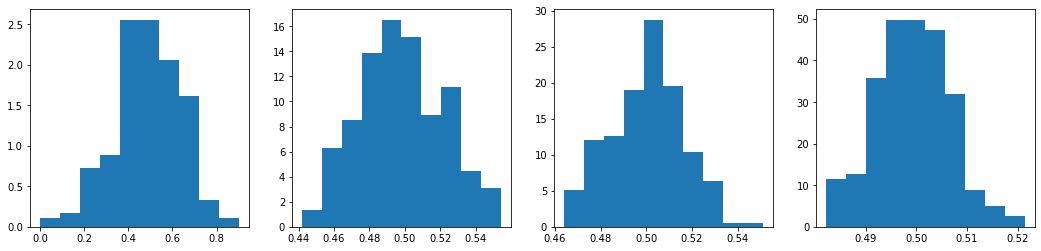

In [3]:
#定义次数
N=[10,500,1000,5000]
plt.figure(figsize = (18,4))
for index,num in enumerate(N):
    p=[]
    for _ in range(0,200):
        c=0
        for _ in range(0,num):
            c+=toss_a_coin() 
        p.append(c/num)
    plt.subplot(1,4,index+1)
    plt.hist(p,normed=True)

可以发现统计量$\frac{m}{N}$有服从正态分布的趋势，均值稳定在0.5，而方差越来越小（峰越来越尖）

### 正态分布的定义
对于一元变量的情况，正态分布可以写作：   

$$
N(x\mid\mu,\sigma^2)=\frac{1}{(2\pi\sigma^2)^{\frac{1}{2}}}exp\{-\frac{1}{2\sigma^2}(x-\mu)^2\}
$$  

其中，$\mu$是均值，$\sigma^2$是方差，对于$D$维向量$x$，它的高斯分布写作：   

$$
N(x\mid\mu,\Sigma)=\frac{1}{(2\pi)^{\frac{D}{2}}}\frac{1}{|\Sigma|^{\frac{1}{2}}}exp\{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\}
$$  

其中，$\mu$是一个$D$维的均值向量，$\Sigma$是一个$D\times D$的协方差矩阵，$|\Sigma|$是$\Sigma$的行列式

#### 均值、协方差
下面直接写一下均值和协方差...
$$
E[x]=\mu\\
var[x]=E[(x-E[x])(x-E[x])^T]=\Sigma
$$   

#### 极大似然估计
$$
\mu_{ML}=\frac{1}{N}\sum_{i=1}^Nx_i\\
\Sigma_{ML}=\frac{1}{N}\sum_{i=1}^N(x_i-\mu_{ML})(x_i-\mu_{ML})^T
$$   

这里需要注意下协方差的极大似然估计是有偏的，即   

$$
E[\Sigma_{ML}]=\frac{N-1}{N}\Sigma
$$   

#### 条件概率分布以及边缘概率分布

对于多元高斯分布，它的条件概率分布以及边缘概率分布也是一个高斯分布，我们不妨将随机变量拆为两部分：     

$$
x=\binom{x_a}{x_b}
$$   

那么，对应的均值和协方差可以写作：    

$$
\mu=\binom{\mu_a}{\mu_b}\\
\Sigma=\begin{pmatrix}
\Sigma_{aa} & \Sigma_{ab}\\ 
\Sigma_{ba} & \Sigma_{bb}
\end{pmatrix}
$$   

有时为了方便表示，我们会直接用到协方差矩阵的逆，称为精度，可以写作：    

$$
\Lambda = \Sigma^{-1}=\begin{pmatrix}
\Lambda_{aa} & \Lambda_{ab}\\ 
\Lambda_{ba} & \Lambda_{bb}
\end{pmatrix}
$$   

那么**条件概率分布**公式：  

$$
p(x_a\mid x_b)=N(x_a\mid \mu_{a\mid b},\Lambda_{aa}^{-1})
$$   

这里，$\mu_{a\mid b}=\mu_a-\Lambda_{aa}^{-1}\Lambda_{ab}(x_b-\mu_b)$，接下来，**边缘概率分布**的公式：   

$$
p(x_a)=N(x_a\mid\mu_a,\Sigma_{aa})
$$   

如下图，左侧是两个变量上的高斯联合概率分布$p(x_a,x_b)$的轮廓线（绿色），右侧是边缘概率分布$p(x_a)$（蓝色）和$x_b=0.7$的条件概率分布$p(x_a\mid x_b)$（红色曲线）

<img src="../images/高斯条件概率与边缘概率.png" width="40%">

接下来，让我们继续看看正态分布的共轭先验...

### 二.共轭先验

这一节就只推导一维高斯分布的共轭先验，我们首先假设$\sigma^2$是已知的情况下，推导$\mu$的共轭先验，然后再假设$\mu$已知的情况下，推导$\sigma^2$的共轭先验，然后再假设$\mu,\sigma^2$均未知的情况下，推导其共轭先验

#### $\sigma^2$已知的情况
假设$\sigma^2$已知，我们有一组观测$X=\{x_1,x_2,...,x_N\}$，假设均值为$\mu$，那么此时的似然函数可以看做是关于$\mu$的函数：   

$$
p(X\mid\mu)=\prod_{i=1}^Np(x_n\mid\mu)=\frac{1}{(2\pi\sigma^2)^{\frac{N}{2}}}exp\{-\frac{1}{2\sigma^2}\sum_{n=1}^N(x_n-\mu)^2\}
$$   

接下来需要找到一个$p(u)$，让它与$p(X\mid\mu)$相乘后具有与$p(u)$相同的形式，显然$p(\mu)$同样选择一个高斯分布就可以满足，因为都只有指数部分含有$\mu$，而且是关于$\mu$的二次函数，这样就可以将他们整合在一起了，我们不妨假设先验概率分布如下：   

$$
p(\mu)=N(\mu\mid\mu_0,\sigma_0^2)
$$   

从而后验概率：   

$$
p(\mu\mid X)\propto p(X\mid\mu)p(\mu)
$$   

对指数部分进行配方整理后，可以得到后验概率分布的形式为：    

$$
p(\mu\mid X)=N(\mu\mid\mu_N,\sigma_N^2)
$$  

其中：   

$$
\mu_N=\frac{\sigma^2}{N\sigma_0^2+\sigma^2}\mu_0+\frac{N\sigma_0^2}{N\sigma_0^2+\sigma^2}\mu_{ML}\\
\frac{1}{\sigma_N^2}=\frac{1}{\sigma_0^2}+\frac{N}{\sigma^2}
$$  

这里$\mu_{ML}$是$\mu$的最大似然解，即：   

$$
\mu_{ML}=\frac{1}{N}\sum_{n=1}^Nx_n
$$  

通过上面的公式，我们可以得到一些有意思的结论：   

（1）当$N=0$时，后概率分布等于先验概率分布，这在我们意料之中；    
（2）当$N\rightarrow\infty$时，后验均值等于最大似然的均值，后验方差趋近于0，说明后验概率分布会在$\mu_{ML}$处形成一个尖峰；   
（3）当$N$固定，若$\sigma_0^2\rightarrow\infty$时，后验均值就变成了$\mu_{ML}$，这个容易理解，$\sigma_0^2\rightarrow\infty$时，先验分布很平，几乎不能提供有用的先验信息；   

下图演示了后验概率分布随着样本量$N$增加时的变化，其中$N=0$表示先验概率分布：  

<img src="../images/高斯分布_均值的贝叶斯推断.png" width="40%">


#### $\mu$已知的情况
当$\mu$已知时，我们的似然函数可以写作：   

$$
p(X\mid\lambda)=\prod_{n=1}^NN(x_n\mid\mu,\lambda^{-1})\propto\lambda^{\frac{N}{2}}exp[-\frac{\lambda}{2}\sum_{n=1}^N(x_n-\mu)^2]
$$  

其中，$\lambda=\frac{1}{\sigma^2}$，这里用精度表示，后续的推导会更方便，从上面的形式可以看出，对应的共轭先验分布应该满足：（1）正比于$\lambda$的幂指数；（2）同时正比于$\lambda$的线性函数的指数；这样的分布有的，那就是Gamma分布：   

$$
Gam(\lambda\mid a,b)=\frac{1}{\Gamma(a)}b^a\lambda^{a-1}exp(-b\lambda)
$$

不同$a,b$取值下的Gamma分布如下图：   

<img src="../images/gamma分布.png" width="40%">

直接说一下Gamma分布的均值为$E[\lambda]=\frac{a}{b}$，方差为$var[\lambda]=\frac{a}{b^2}$，接下来考虑一个后验分布的形式，假设我们已经定义了一个先验分布$Gam(\lambda\mid a_0,b_0)$，然后乘以上面的似然函数：   

$$
p(\lambda\mid X)\propto \lambda^{a_0-1}\lambda^{\frac{N}{2}}exp[-b_0\lambda-\frac{\lambda}{2}\sum_{n=1}^N(x_n-\mu)^2]
$$  

这显然也是一个Gamma分布的形式，不妨记为$Gam(\lambda\mid a_N,b_N)$，其中：   
$$
a_N=a_0+\frac{N}{2}\\
b_N=b_0+\frac{1}{2}\sum_{n=1}^N(x_n-\mu)^2=b_0+\frac{N}{2}\sigma_{ML}^2
$$

#### $\mu$和$\sigma^2$均未知的情况

大家可能已经能猜想到，这种情况下的共轭先验应该既与高斯分布相关，又与Gamma分布有关，下面推导一下：   

$$
p(X\mid\mu,\lambda)=\prod_{n=1}^N(\frac{\lambda}{2\pi})^{\frac{1}{2}}exp[-\frac{\lambda}{2}(x_n-\mu)^2]\\
\propto exp(-\frac{N\lambda\mu^2}{2}+\lambda\mu\sum_{n=1}^Nx_n)[\lambda^{\frac{N}{2}}exp(-\frac{\lambda}{2}\sum_{n=1}^Nx_n^2)]
$$  

可以发现，右侧$\lambda^{\frac{N}{2}}exp(-\frac{\lambda}{2}\sum_{n=1}^Nx_n^2)$是关于$\lambda$的Gamma分布的形式，左侧$exp(-\frac{N\lambda\mu^2}{2}+\lambda\mu\sum_{n=1}^Nx_n)$可以看做$\lambda$已知的关于$\mu$的高斯分布的形式，所以，我们的先验分布可以写作如下形式：   

$$
p(\mu,\lambda)=p(\mu\mid\lambda)p(\lambda)
$$  

其中$p(\mu\mid\lambda)$是一个高斯分布，$p(\lambda)$是一个Gamma分布，经过归一化整理，我们的先验分布可以写作如下形式：   

$$
p(\mu,\lambda)=N(\mu\mid\mu_0,(\beta\lambda)^{-1})Gam(\lambda\mid a,b)
$$  

这里，$\beta$是一个超参数，类比上面的样本量$N$，该分布也被称为**高斯-Gamma分布**

## 指数族分布

### 指数族分布的形式
前面几节介绍的概率分布其实可以用一种统一的形式的来表示：    

$$
p(x\mid\eta)=h(x)g(\eta)exp[\eta^T\mu(x)]
$$   

这便是指数家族分布，其中$g(\eta)$可以看做归一化系数，下面来看看前面介绍过的几种分布变换为指数族分布后的形式

#### 伯努利分布

$$
p(x\mid\mu)=\mu^x(1-\mu)^{1-x}\\
=exp[xlog\mu+(1-x)log(1-mu)]\\
=(1-\mu)exp[log(\frac{\mu}{1-\mu})x]
$$  

所以，$\eta=ln(\frac{\mu}{1-\mu})$，可以推得：   
$$
\mu=\sigma(\eta)=\frac{1}{1+exp(-\eta)}
$$  

所以对应的指数家族的函数关系为：   

$$
h(x)=1,g(\eta)=1-\mu=1-\sigma(\eta)=\sigma(-\eta),\mu(x)=x
$$   

#### 单一观测的多项式分布

$$
p(x\mid\mu)=\prod_{k=1}^M\mu_k^{x_k}=exp[\sum_{k=1}^Mx_klog\mu_k]
$$   

所以：   

$$
h(x)=1\\
g(\eta)=1\\
\mu(x)=(x_1,...,x_M)^T=x\\
\eta=(log\mu_1,...,log\mu_M)^T
$$  

注意：$\eta_k$之间不是相互独立的，因为有一个约束$\sum_{k=1}^M\mu_k=1$   


#### 一元高斯分布
$$
p(x\mid\mu,\sigma^2)=\frac{1}{(2\pi\sigma^2)^{\frac{1}{2}}}exp[-\frac{1}{2\sigma^2}(x-\mu)^2]\\
=\frac{1}{(2\pi\sigma^2)^{\frac{1}{2}}}exp[-\frac{1}{2\sigma^2}x^2+\frac{\mu}{\sigma^2}x-\frac{1}{2\sigma^2}\mu^2]\\
=\frac{1}{(2\pi\sigma^2)^{\frac{1}{2}}}exp[-\frac{1}{2\sigma^2}\mu^2]exp[-\frac{1}{2\sigma^2}x^2+\frac{\mu}{\sigma^2}x]
$$  

我们可以令：   

$$
\eta=(\frac{\mu}{\sigma^2},\frac{-1}{2\sigma^2})^T\\
\mu(x)=(x,x^2)^T\\
$$   
最后可以推得：   

$$
h(x)=(2\pi)^{2\frac{1}{2}}\\
g(\eta)=(-2\eta_2)^{\frac{1}{2}}exp(\frac{\eta_1^2}{4\eta_2})
$$   

剩下地，如多元高斯分布，Gamma分布，beta分布，狄利克雷分布，多项式分布，二项分布等都可以通过类似的方式转换为指数家族分布，那么问题就来了，将这些分布转换为指数族分布的形式有啥好处呢？自然是为了计算上更加方便，特别是求极大似然估计以及求共轭先验上，下面分别介绍

### 极大似然估计
在做极大似然估计前我们先看一个一般的结论，由于指数族分布必然是一个概率分布，所以有：   

$$
g(\eta)\int h(x)exp[\eta^T\mu(x)]dx=1
$$   

两边对$\eta$求梯度，有：   

$$
\nabla g(\eta)\int h(x)exp[\eta^T\mu(x)]dx+g(\eta)\int h(x)exp[\eta^T\mu(x)]u(x)dx=0\\
\Leftrightarrow -\nabla g(\eta)\frac{1}{g(\eta)}=g(\eta)\int h(x)exp[\eta^T\mu(x)]u(x)dx=E[\mu(x)]\\
\Leftrightarrow -\nabla ln[g(\eta)]=E[\mu(x)]
$$   

注意，上面的等式是恒成立的哦，我们自然就会猜想，如果是求极大似然估计，它的形式应该也会和上面的等式差不多才对，下面省略求解过程，直接写出极大似然估计的结果：    

$$
-\nabla ln[g(\eta_{ML})]=\frac{1}{N}\sum_{n=1}^N\mu(x_n)
$$  

显然，当$N\rightarrow\infty$时，有$\frac{1}{N}\sum_{n=1}^N\mu(x_n)=E[\mu(x)]$，以及$\eta_{ML}=\eta$

### 共轭先验

对于指数分布家族的任何成员，都存在一个共轭先验，可以写作如下的形式：   

$$
p(\eta\mid \chi,\nu)=f(\chi,\nu)g(\eta)^\nu exp[\nu\eta^T\chi]
$$  

其中，$f(\chi,\nu)$是归一化系数，为了验证该分布是共轭先验，让它与如下的似然函数相乘：    

$$
p(X\mid\eta)=(\prod_{n=1}^Nh(x_n))g(\eta)^Nexp[\eta^T\sum_{n=1}^N\mu(x_n)]
$$  

可推得：   

$$
p(\eta\mid x,\chi,\nu)\propto g(\eta)^{\nu+N}exp[\eta^T(\sum_{n=1}^N\mu(x_n)+\nu\chi)]
$$  

这与先验分布具有相同的形式

### 小结一下

用下图对概率分布这几节的内容做个简单梳理：   
![avatar](../images/概率分布之间的关系.png)